Missing values in each column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Classification Report:
              precision    recall

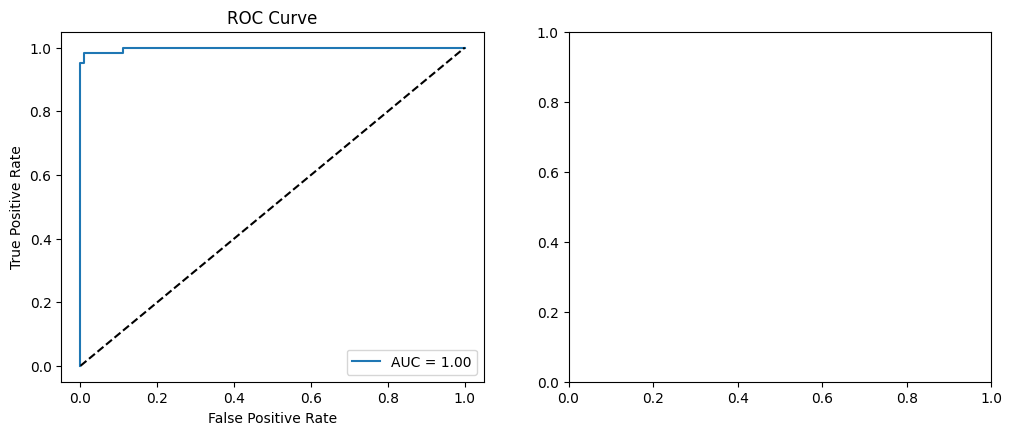

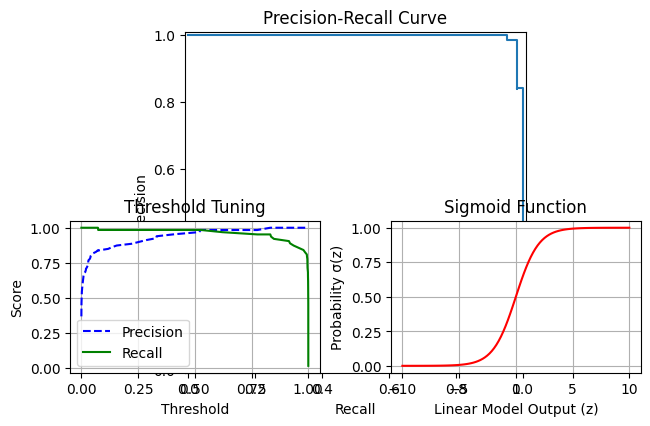

In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay

# Load the dataset
df = pd.read_csv("C:/Users/lenov/Downloads/data.csv")

# Data Cleaning
# 1. Remove empty columns (like 'Unnamed: 32')
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

# 2. Remove rows with missing values in the target column
df = df.dropna(subset=['diagnosis'])
# 3. Convert target to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# 4. Remove ID column
df = df.drop('id', axis=1)

# Check for missing values in features
print("Missing values in each column:")
print(df.isnull().sum())

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split data into train/test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Handle missing values in features using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get precision-recall thresholds
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12, 10))

# ROC Curve
plt.subplot(2, 2, 1)
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Precision-Recall Curve
plt.subplot(2, 2, 2)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')

# Threshold Tuning Visualization
plt.subplot(2, 2, 3)
plt.plot(pr_thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(pr_thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Threshold Tuning')
plt.grid(True)

# Sigmoid Function
plt.subplot(2, 2, 4)
x_sigmoid = np.linspace(-10, 10, 100)
y_sigmoid = 1 / (1 + np.exp(-x_sigmoid))
plt.plot(x_sigmoid, y_sigmoid, 'r-')
plt.title('Sigmoid Function')
plt.xlabel('Linear Model Output (z)')
plt.ylabel('Probability σ(z)')
plt.grid(True)

plt.tight_layout()
plt.show()